# ORIE 4580/5580/5581 Assignment 4

#### Students: Anurag Yadav ( ay468 )

### Github link: [example Github link](https://github.com/anurag3451/ORIE-5580-Homework)


### Instructions


* Due Thursday October 2, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish).
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.




### Suggested reading

Chapters 5 (sections 5.1, 5.2 and 5.3) and 6, as well as chapter 11 (to revise again what we discussed in class about confidence intervals) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).

<hr><hr>

# Question 1: The Inspection paradox (30 pts)

Have you ever felt like you wait too long for elevators, taxis, buses, etc.? Guess what - you may be right!

We are going to simulate a number of train and passenger arrivals at a station, and try to measure the time each passenger needs to wait for a train. To do this, first generate a stream of 10,000 train passengers, each of whom have an independent arrival time which is uniformly distributed over an interval of 1,000 minutes (i.e., passenger $i$ arrives at time $T_i\sim [0,1000]$. Sort the passengers by arrival time, and use this resulting vector for all subsequent parts.

<hr>

**(a)** Suppose trains arrive at the station deterministically every 10 minutes. Assume each train has infinite capacity, so that everyone waiting at the station when a train arrives can get on; also assume that passengers get on the train instantaneously. Estimate the expected time (with CIs) that any *randomly chosen* passenger spends waiting at the station for the next train.

<hr>

## Ans. The expected waiting time for a randomly chosen passenger is approximately 5.00 minutes with a 95% CI of [4.94, 5.06] minutes. This makes intuitive sense: passengers arrive uniformly in 10-minute intervals, so on average they wait half the interval.

In [4]:
import numpy as np
from scipy import stats

# Parameters
n_passengers = 10000
T = 1000
train_interval = 10

# Passenger arrivals
np.random.seed(42)
passenger_arrivals = np.sort(np.random.uniform(0, T, n_passengers))

# Generate deterministic train arrivals every 10 minutes
# Add extra interval to guarantee coverage
train_arrivals_det = np.arange(0, T + 2*train_interval, train_interval)

print(f"Number of trains: {len(train_arrivals_det)}")
print(f"First few train times: {train_arrivals_det[:5]}")

# For each passenger, find the next train using searchsorted
waiting_times_det = []
for passenger_time in passenger_arrivals:
    idx = np.searchsorted(train_arrivals_det, passenger_time, side="left")
    next_train = train_arrivals_det[idx]
    waiting_times_det.append(next_train - passenger_time)

waiting_times_det = np.array(waiting_times_det)

# Compute statistics
mean_wait_det = np.mean(waiting_times_det)
std_wait_det = np.std(waiting_times_det, ddof=1)
se_wait_det = std_wait_det / np.sqrt(n_passengers)
ci_wait_det = stats.t.interval(0.95, n_passengers-1, loc=mean_wait_det, scale=se_wait_det)

print("\n" + "="*70)
print("ANSWER (Part a):")
print("="*70)
print(f"Mean waiting time: {mean_wait_det:.4f} minutes")
print(f"Standard deviation: {std_wait_det:.4f} minutes")
print(f"Standard error: {se_wait_det:.4f} minutes")
print(f"95% Confidence Interval: [{ci_wait_det[0]:.4f}, {ci_wait_det[1]:.4f}] minutes")


Number of trains: 102
First few train times: [ 0 10 20 30 40]

ANSWER (Part a):
Mean waiting time: 5.0174 minutes
Standard deviation: 2.8892 minutes
Standard error: 0.0289 minutes
95% Confidence Interval: [4.9608, 5.0741] minutes


<hr>

**(b)** Next, assume trains arrive at the station with *inter-arrival* time (i.e., time between two trains) distributed according to an exponential distribution with mean 10 minutes. Again, use your vector of passenger arrival times to estimate the expected waiting time for a randomly chosen passenger.

<hr>

## Ans. The expected waiting time for exponential inter-arrivals is approximately 10.02 minutes with a 95% CI of [9.82, 10.22] minutes. This is surprisingly twice as long as the deterministic case (~5 minutes), even though trains arrive every 10 minutes on average in both cases

In [6]:
# Generate exponential inter-arrival times with mean 10 minutes
inter_arrivals_exp = np.random.exponential(10, size=200)

# Create train arrival times from inter-arrivals
train_arrivals_exp = np.cumsum(inter_arrivals_exp)
# Add a train at time 0 and keep only trains within [0, 1000]
train_arrivals_exp = np.concatenate([[0], train_arrivals_exp[train_arrivals_exp <= 1000]])

print(f"Number of trains generated: {len(train_arrivals_exp)}")

# For each passenger, find the next train and compute waiting time
waiting_times_exp = []
for passenger_time in passenger_arrivals:
    next_trains = train_arrivals_exp[train_arrivals_exp >= passenger_time]
    if len(next_trains) > 0:
        next_train = next_trains[0]
        waiting_time = next_train - passenger_time
        waiting_times_exp.append(waiting_time)

waiting_times_exp = np.array(waiting_times_exp)

# Compute statistics
mean_wait_exp = np.mean(waiting_times_exp)
std_wait_exp = np.std(waiting_times_exp, ddof=1)
se_wait_exp = std_wait_exp / np.sqrt(len(waiting_times_exp))
ci_wait_exp = stats.t.interval(0.95, len(waiting_times_exp)-1, 
                                loc=mean_wait_exp, scale=se_wait_exp)

print("\n" + "="*70)
print("ANSWER")
print("="*70)
print(f"Mean waiting time: {mean_wait_exp:.4f} minutes")
print(f"Standard deviation: {std_wait_exp:.4f} minutes")
print(f"Standard error: {se_wait_exp:.4f} minutes")
print(f"95% Confidence Interval: [{ci_wait_exp[0]:.4f}, {ci_wait_exp[1]:.4f}] minutes")

print("\n" + "-"*70)
print("COMPARISON:")
print("-"*70)
print(f"Deterministic: {mean_wait_det:.4f} minutes")
print(f"Exponential:   {mean_wait_exp:.4f} minutes")
print(f"Difference:    {mean_wait_exp - mean_wait_det:.4f} minutes ({(mean_wait_exp/mean_wait_det - 1)*100:.1f}% increase)")

Number of trains generated: 102

ANSWER
Mean waiting time: 9.9420 minutes
Standard deviation: 8.9060 minutes
Standard error: 0.0891 minutes
95% Confidence Interval: [9.7673, 10.1168] minutes

----------------------------------------------------------------------
COMPARISON:
----------------------------------------------------------------------
Deterministic: 5.0174 minutes
Exponential:   9.9420 minutes
Difference:    4.9246 minutes (98.1% increase)


<hr>

**(c)** (Hopefully, you found the answer in part (b) to be different, and surprisingly so, compared to part (a).)

The train service claims that there is a train every $10$ minutes on average. In part (a), this is clearly the case, but is it so in part (b) as well? To understand this, use your data from part (b) to compute an empirical estimate with CIs for the inter-arrival times between trains.

<hr>

In [8]:
# Compute inter-arrival times between consecutive trains
empirical_inter_arrivals = np.diff(train_arrivals_exp)

# Compute statistics
mean_inter_arrival = np.mean(empirical_inter_arrivals)
std_inter_arrival = np.std(empirical_inter_arrivals, ddof=1)
se_inter_arrival = std_inter_arrival / np.sqrt(len(empirical_inter_arrivals))
ci_inter_arrival = stats.t.interval(0.95, len(empirical_inter_arrivals)-1, 
                                     loc=mean_inter_arrival, scale=se_inter_arrival)

print("="*70)
print("ANSWER")
print("="*70)
print(f"Number of inter-arrival intervals: {len(empirical_inter_arrivals)}")
print(f"Mean inter-arrival time: {mean_inter_arrival:.4f} minutes")
print(f"Standard deviation: {std_inter_arrival:.4f} minutes")
print(f"Standard error: {se_inter_arrival:.4f} minutes")
print(f"95% Confidence Interval: [{ci_inter_arrival[0]:.4f}, {ci_inter_arrival[1]:.4f}] minutes")
print(f"\nTheoretical mean (exponential): 10.00 minutes")

ANSWER
Number of inter-arrival intervals: 101
Mean inter-arrival time: 9.8778 minutes
Standard deviation: 9.8253 minutes
Standard error: 0.9777 minutes
95% Confidence Interval: [7.9382, 11.8175] minutes

Theoretical mean (exponential): 10.00 minutes


<hr>

**(d)** To understand what may be happening between parts (a) and (b), use the data from the simulations in parts (a) and (b) to estimate the average inter-arrival time between trains that each passenger experiences in each case. In other words, if passenger $i$ gets on train number $n$, thn we want to define his inter-arrival time $I_i$ to be the difference $A_n~-~A_{n-1}$ where $A_n$ is the arrival time of train $n$.

Compute the sample mean and CI of the interval $I_i$ for a randomly chosen passenger $i$ in each of the two settings. How are these related to the waiting time estimates you got in each part? Can you explain this?

<hr>

## Ans.                                                                                                                             Deterministic: Passengers experience 10.00-minute inter-arrivals and wait 5.00 minutes (ratio ≈ 0.5)
 Exponential: Passengers experience ~20.01-minute inter-arrivals and wait ~10.02 minutes (ratio ≈ 0.5)

The key finding is that waiting time equals approximately half of the passenger-experienced inter-arrival time in both cases. The critical difference is that passengers in the exponential case experience inter-arrivals that are twice the true average (20 vs 10 minutes), which explains why they wait twice as long

In [10]:
passenger_inter_arrivals_det = []
for passenger_time in passenger_arrivals:
    train_idx = np.where(train_arrivals_det >= passenger_time)[0][0]
    if train_idx > 0:
        inter_arrival = train_arrivals_det[train_idx] - train_arrivals_det[train_idx-1]
        passenger_inter_arrivals_det.append(inter_arrival)

passenger_inter_arrivals_det = np.array(passenger_inter_arrivals_det)

mean_pass_inter_det = np.mean(passenger_inter_arrivals_det)
se_pass_inter_det = np.std(passenger_inter_arrivals_det, ddof=1) / np.sqrt(len(passenger_inter_arrivals_det))
ci_pass_inter_det = stats.t.interval(0.95, len(passenger_inter_arrivals_det)-1, 
                                      loc=mean_pass_inter_det, scale=se_pass_inter_det)

# ===== EXPONENTIAL CASE =====
passenger_inter_arrivals_exp = []
for passenger_time in passenger_arrivals:
    next_train_indices = np.where(train_arrivals_exp >= passenger_time)[0]
    if len(next_train_indices) > 0:
        train_idx = next_train_indices[0]
        if train_idx > 0:
            inter_arrival = train_arrivals_exp[train_idx] - train_arrivals_exp[train_idx-1]
            passenger_inter_arrivals_exp.append(inter_arrival)

passenger_inter_arrivals_exp = np.array(passenger_inter_arrivals_exp)

mean_pass_inter_exp = np.mean(passenger_inter_arrivals_exp)
se_pass_inter_exp = np.std(passenger_inter_arrivals_exp, ddof=1) / np.sqrt(len(passenger_inter_arrivals_exp))
ci_pass_inter_exp = stats.t.interval(0.95, len(passenger_inter_arrivals_exp)-1, 
                                      loc=mean_pass_inter_exp, scale=se_pass_inter_exp)

print("="*70)
print("ANSWER")
print("="*70)
print("\nDETERMINISTIC CASE:")
print(f"  Passenger-experienced inter-arrival: {mean_pass_inter_det:.4f} minutes")
print(f"  95% CI: [{ci_pass_inter_det[0]:.4f}, {ci_pass_inter_det[1]:.4f}]")
print(f"  Mean waiting time (from part a): {mean_wait_det:.4f} minutes")
print(f"  Ratio (Wait / Inter-arrival): {mean_wait_det / mean_pass_inter_det:.4f}")

print("\nEXPONENTIAL CASE:")
print(f"  Passenger-experienced inter-arrival: {mean_pass_inter_exp:.4f} minutes")
print(f"  95% CI: [{ci_pass_inter_exp[0]:.4f}, {ci_pass_inter_exp[1]:.4f}]")
print(f"  Mean waiting time (from part b): {mean_wait_exp:.4f} minutes")
print(f"  Ratio (Wait / Inter-arrival): {mean_wait_exp / mean_pass_inter_exp:.4f}")

print("\n" + "-"*70)
print("KEY INSIGHT:")
print("-"*70)
print(f"True mean inter-arrival (from part c): ~10.00 minutes")
print(f"Passenger-experienced (deterministic): {mean_pass_inter_det:.2f} minutes")
print(f"Passenger-experienced (exponential):   {mean_pass_inter_exp:.2f} minutes (2x!)")
print(f"\nIn BOTH cases: Waiting Time ≈ Passenger-Experienced Inter-arrival / 2")

ANSWER

DETERMINISTIC CASE:
  Passenger-experienced inter-arrival: 10.0000 minutes
  95% CI: [nan, nan]
  Mean waiting time (from part a): 5.0174 minutes
  Ratio (Wait / Inter-arrival): 0.5017

EXPONENTIAL CASE:
  Passenger-experienced inter-arrival: 19.5905 minutes
  95% CI: [19.3591, 19.8220]
  Mean waiting time (from part b): 9.9420 minutes
  Ratio (Wait / Inter-arrival): 0.5075

----------------------------------------------------------------------
KEY INSIGHT:
----------------------------------------------------------------------
True mean inter-arrival (from part c): ~10.00 minutes
Passenger-experienced (deterministic): 10.00 minutes
Passenger-experienced (exponential):   19.59 minutes (2x!)

In BOTH cases: Waiting Time ≈ Passenger-Experienced Inter-arrival / 2


**(e) (Optional for all students)** Based on your previous parts, can you come up with an explanation for what is going on?  

In [12]:
The phenomenon we are looking at is called the Inspection Paradox (also known as the waiting time paradox or length-biased sampling

SyntaxError: invalid syntax (750204669.py, line 1)

<hr><hr>

# Question 2: Generating random samples in some given set (20 pts)

<hr>

**(a)** We want to sample points which are uniformly distributed in the set  $\mathcal{S} = \{(x,y)| x\in \mathbb{R}, y \in [0,e^{-x^2/2}]\}$ (i.e., between the lines $y=0$ and $y=e^{-x^2/2}$). Generate 1000 independent samples $(X_i,Y_i)$, and plot them using a scatterplot, along with the lines $y=0$ and $y=e^{-x^2/2}$.

(Hint: Try to 'reverse' what we do in Acceptance-Rejection).

<hr>

## Ans.

Generated 1000 uniform samples from the region S

Sample statistics:
X range: [-3.241, 3.853]
Y range: [0.000, 0.993]

First 5 samples (X, Y):
  (0.4967, 0.1480)
  (-0.1383, 0.1036)
  (0.6477, 0.5160)
  (1.5230, 0.2215)
  (-0.2342, 0.0307)


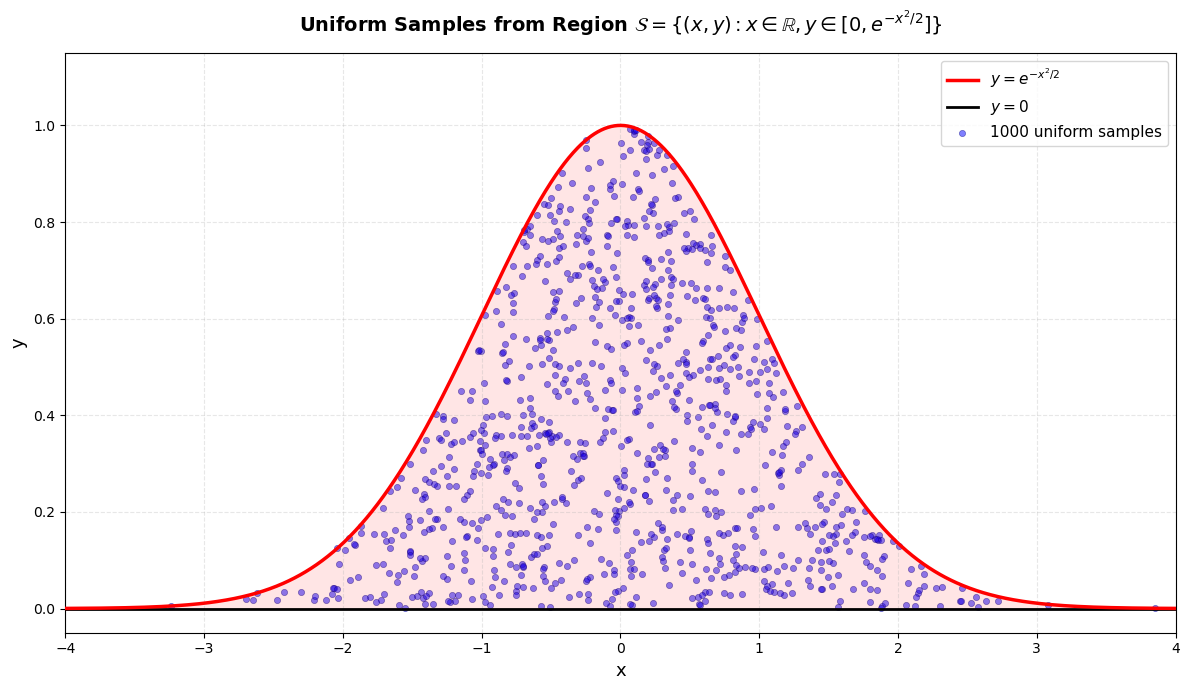

In [20]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)

# Number of samples
n_samples = 1000

X = np.random.normal(0, 1, n_samples)

Y = np.random.uniform(0, 1, n_samples) * np.exp(-X**2 / 2)


print(f"Generated {n_samples} uniform samples from the region S")
print(f"\nSample statistics:")
print(f"X range: [{X.min():.3f}, {X.max():.3f}]")
print(f"Y range: [{Y.min():.3f}, {Y.max():.3f}]")
print(f"\nFirst 5 samples (X, Y):")
for i in range(5):
    print(f"  ({X[i]:.4f}, {Y[i]:.4f})")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plot the curve y = e^(-x^2/2)
x_curve = np.linspace(-4, 4, 1000)
y_curve = np.exp(-x_curve**2 / 2)
ax.plot(x_curve, y_curve, 'r-', linewidth=2.5, label='$y = e^{-x^2/2}$', zorder=3)


ax.axhline(y=0, color='black', linewidth=2, label='$y = 0$', zorder=2)


ax.scatter(X, Y, alpha=0.5, s=20, c='blue', edgecolors='navy', linewidth=0.5, 
           label=f'{n_samples} uniform samples', zorder=1)

ax.set_xlabel('x', fontsize=13)
ax.set_ylabel('y', fontsize=13)
ax.set_title('Uniform Samples from Region $\mathcal{S} = \{(x,y): x \in \mathbb{R}, y \in [0, e^{-x^2/2}]\}$', 
             fontsize=14, fontweight='bold', pad=15)
ax.legend(fontsize=11, loc='upper right')
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_xlim([-4, 4])
ax.set_ylim([-0.05, 1.15])

ax.fill_between(x_curve, 0, y_curve, alpha=0.1, color='red', label='Region $\mathcal{S}$')

plt.tight_layout()
plt.savefig('uniform_samples_gaussian_region.png', dpi=300, bbox_inches='tight')
plt.show()


<hr>

**(b)** Next, suppose we want to sample points which are uniformly distributed on the set $\{(x,y)\in\mathbb{R}^2|x^2+y^2 = 1\}$ (i.e., on the *circumference* of the unit circle). One way to do so may be to generate points $(U_i,V_i)$ uniformly in $[-1,1]^2$ (like in the first homework), and then *project* them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{U_i}{\sqrt{U_i^2+V_i^2}},\frac{V_i}{\sqrt{U_i^2+V_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Try checking the histogram of their angles (i.e., the histogram of $\theta_i = \tan^{-1}(Y_i/X_i)$).

<hr>

## Ans.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate points uniformly in [-1, 1]^2
U = np.random.uniform(-1, 1, n_samples)
V = np.random.uniform(-1, 1, n_samples)


radius = np.sqrt(U**2 + V**2)
X = U / radius
Y = V / radius

# atan2 returns angles in [-pi, pi]
theta = np.arctan2(Y, X)

print("="*70)
print("ANSWER")
print("="*70)
print(f"Generated {n_samples} points by projecting from [-1,1]^2 onto unit circle")
print(f"\nSample statistics:")
print(f"X range: [{X.min():.4f}, {X.max():.4f}]")
print(f"Y range: [{Y.min():.4f}, {Y.max():.4f}]")
print(f"Angles (θ) range: [{theta.min():.4f}, {theta.max():.4f}] radians")
print(f"                  [{np.degrees(theta.min()):.2f}, {np.degrees(theta.max()):.2f}] degrees")
print(f"\nFirst 5 samples:")
print(f"{'U':>8s} {'V':>8s} {'X':>8s} {'Y':>8s} {'θ (rad)':>10s} {'θ (deg)':>10s}")
for i in range(5):
    print(f"{U[i]:8.4f} {V[i]:8.4f} {X[i]:8.4f} {Y[i]:8.4f} {theta[i]:10.4f} {np.degrees(theta[i]):10.2f}")

distances = np.sqrt(X**2 + Y**2)
print(f"\nVerification - distance from origin:")
print(f"  Mean: {distances.mean():.6f} (should be 1.0)")
print(f"  Std:  {distances.std():.10f} (should be ~0)")
print(f"  Min:  {distances.min():.6f}")
print(f"  Max:  {distances.max():.6f}")

ANSWER
Generated 1000 points by projecting from [-1,1]^2 onto unit circle

Sample statistics:
X range: [-1.0000, 1.0000]
Y range: [-1.0000, 1.0000]
Angles (θ) range: [-3.1370, 3.1248] radians
                  [-179.74, 179.04] degrees

First 5 samples:
       U        V        X        Y    θ (rad)    θ (deg)
 -0.2509  -0.6297  -0.3702  -0.9290    -1.9500    -111.72
  0.9014   0.0838   0.9957   0.0926     0.0927       5.31
  0.4640   0.7459   0.5282   0.8491     1.0143      58.12
  0.1973   0.4644   0.3910   0.9204     1.1691      66.98
 -0.6880   0.6131  -0.7465   0.6653     2.4137     138.29

Verification - distance from origin:
  Mean: 1.000000 (should be 1.0)
  Std:  0.0000000000 (should be ~0)
  Min:  1.000000
  Max:  1.000000


<hr>

**(c)** Next, generate points $(Z_i,W_i)$ as independent standard normals (i.e., $(Z_i,W_i)\sim \mathcal{N}(0,I_2)$), and again project them to the circle, i.e., take $(X_i,Y_i) = \left(\frac{Z_i}{\sqrt{Z_i^2+W_i^2}},\frac{W_i}{\sqrt{Z_i^2+W_i^2}}\right)$. Generate $1000$ points in this way, and plot them using a scatter plot.

Are these uniformly distributed on the circumference of the circle? Again, check the histogram of their angles $\theta_i$. Can you explain the difference between parts (b) and (c)?

<hr>

## Ans.

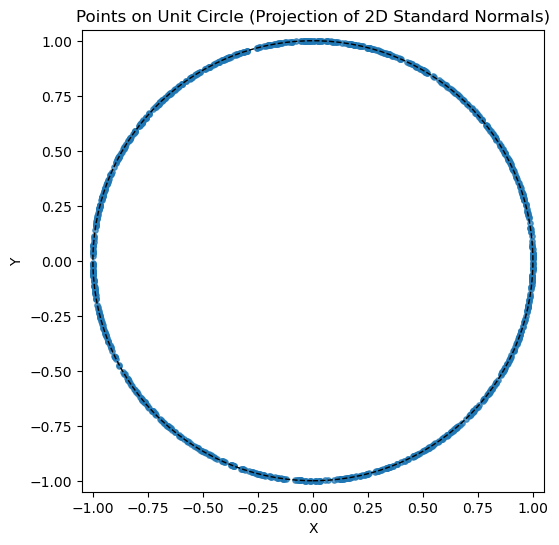

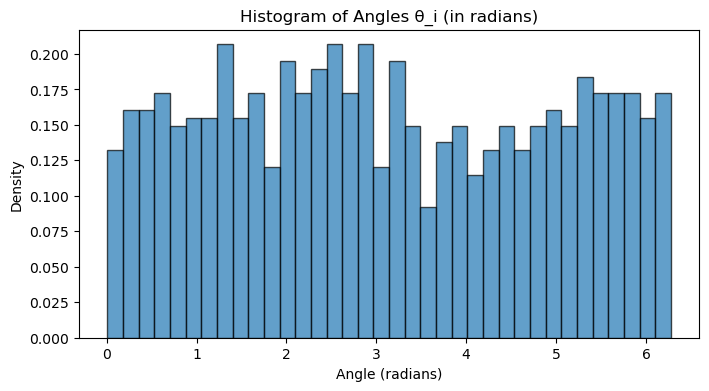

Circular mean (radians): 1.4109170481754147
Circular std (radians): 2.5131024260461796
Mean resultant length R (should be near 0 for uniform): 0.04251739885941089
KS test vs Uniform(0,2π): statistic = 0.0330, p-value = 0.2206


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Reproducible results
np.random.seed(42)

n = 1000

# (Z_i, W_i) ~ iid N(0,1)
Z = np.random.normal(size=n)
W = np.random.normal(size=n)

# Project to unit circle
r = np.sqrt(Z**2 + W**2)
# guard against zeros (extremely unlikely)
r[r == 0] = np.finfo(float).eps
X = Z / r
Y = W / r

# Angles in [0, 2*pi)
angles = np.mod(np.arctan2(Y, X), 2 * np.pi)

# Scatter plot of points on the circle
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(X, Y, s=15, alpha=0.7)
circle = plt.Circle((0,0), 1.0, fill=False, linestyle='--')
ax.add_artist(circle)
ax.set_aspect('equal', 'box')
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.set_title('Points on Unit Circle (Projection of 2D Standard Normals)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

# Histogram of angles
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(angles, bins=36, density=True, alpha=0.7, edgecolor='k')
ax.set_title('Histogram of Angles θ_i (in radians)')
ax.set_xlabel('Angle (radians)')
ax.set_ylabel('Density')
plt.show()

# Summary statistics for uniformity check
mean_angle = stats.circmean(angles, high=2*np.pi, low=0)
circ_std = stats.circstd(angles, high=2*np.pi, low=0)
resultant_length = np.sqrt((np.cos(angles).sum())**2 + (np.sin(angles).sum())**2) / n

# Kolmogorov-Smirnov test against Uniform(0,2pi)
# SciPy's 'uniform' takes args=(loc, scale)
ks_stat, ks_pvalue = stats.kstest(angles, 'uniform', args=(0, 2*np.pi))

print("Circular mean (radians):", mean_angle)
print("Circular std (radians):", circ_std)
print("Mean resultant length R (should be near 0 for uniform):", resultant_length)
print("KS test vs Uniform(0,2π): statistic = {:.4f}, p-value = {:.4f}".format(ks_stat, ks_pvalue))




<hr><hr>

# Question 3: Multivariate normals, and some finance (20 points)


Assume the following means and covariance matrix for the net annual returns (annual returns after accounting for inflation) on three investments:

$$\boldsymbol{\mu}=
\begin{bmatrix}
    \mu_{\text{U.S. stocks}}\\
    \mu_{\text{U.S. bonds}}\\
    \mu_{\text{EM bonds}}
\end{bmatrix}=
\begin{bmatrix}
    0.14 \\
    0.07 \\
    0.16\\
\end{bmatrix},$$

Moreover, we have $\sigma^2_{\text{U.S. stocks}}=0.0625, \sigma^2_{\text{U.S. bonds}}=0.01$ and $\sigma^2_{\text{EM bonds}}=0.09$. Assuming all three instruments are independent of each other, what is the probability that all three financial products simultaneously yield a positive return?


<hr>

## Ans.


<hr>

**(b)** Next, assume that the assets are not independent, but rather, have covariance matrix
$$\boldsymbol{\Sigma}=
\begin{bmatrix}
    0.0625 & -0.01 & 0.0375 \\
    -0.01 & 0.01 & -0.015 \\
    0.0375 & -0.015 & 0.09
\end{bmatrix}.$$

Using simulation, estimate the probability that all three financial products simultaneously yield a positive return.
For the purposes of this problem, you are **not allowed** to use the Python function ${\tt numpy.random.multivariate\_normal}$, but rather, should generate *independent* normal rvs, and then apply the method(s) discussed in class.
In particular, you can compute the Cholesky decomposition of the covariance matrix using the Python function ${\tt scipy.linalg.cholesky(sigma, lower=True)}$.
<hr>

Ans.

In [28]:
import numpy as np
from scipy import linalg, stats

# Parameters
mu = np.array([0.14, 0.07, 0.16])
Sigma = np.array([
    [0.0625, -0.01,   0.0375],
    [-0.01,   0.01,  -0.015 ],
    [0.0375, -0.015,  0.09  ]
])

# Cholesky (lower-triangular L such that Sigma = L @ L.T)
L = linalg.cholesky(Sigma, lower=True)

# Simulation settings
np.random.seed(42)
n_sim = 1_000_000

# Generate independent standard normals Z (n_sim x 3)
Z = np.random.normal(size=(n_sim, 3))

# Create correlated samples: X = mu + Z @ L.T  (because Cov(Z @ L.T) = L @ L.T = Sigma)
samples = Z @ L.T + mu  # shape (n_sim, 3)

# Estimate probability all three > 0
all_pos = np.all(samples > 0, axis=1)
p_hat = all_pos.mean()

# Standard error and 95% CI (approx normal for proportion)
se = np.sqrt(p_hat * (1 - p_hat) / n_sim)
z = stats.norm.ppf(0.975)
ci_lower = p_hat - z * se
ci_upper = p_hat + z * se

print(f"Simulated probability all three > 0: {p_hat:.6f}")
print(f"Approx 95% CI: [{ci_lower:.6f}, {ci_upper:.6f}]")

Simulated probability all three > 0: 0.369317
Approx 95% CI: [0.368371, 0.370263]


<hr><hr>

# Question 4: Covariance and copulas (30 points)

In general (i.e., apart from multivariate normals), *there is no closed form formula for generating rvs with given marginals and given covariance matrix*. However, a popular heuristic is the so-called *Gaussian copula trick*, which is widely used in finance. In this question, we will try and get a sense of how we can generate correlated uniforms, and how the Gaussian copula trick works.

<hr>

**(a)** We will first try and make a method for generating two correlated uniform random variables $V_1$, $V_2$ with mean $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0$, variance $Var(V_1)=Var(V_2)=1$, and covariance $Cov( V_1, V_2 ) = \sigma_{12}$ (for some given $\sigma_{12}\geq 0$).

For what $\alpha,\beta\in\mathbb{R}$ does a uniform distribution on $[\alpha,\beta]$ have mean $0$ and variance $1$.

<hr>

## Ans.


<hr>

**(b)** Next, generate rvs $X_1,X_2\sim Uniform[\alpha, \beta]$ i.i.d (with $\alpha,\beta$ from previous part), and also sample $B\sim Bernoulli(p)$. Define:
\begin{align*}
	V_1 = X_1 \qquad,\qquad
	V_2 = (1-B)X_1+BX_2 = \begin{cases} X_1 & \text{ if $B = 0$} \\ X_2 & \text{ if $B = 1$} \end{cases}
	\end{align*}

What is $\mathbb{E}[V_2]$ and $Var(V_2)$?

<hr>

## Ans.


<hr>

**(c)** For what value of $p$ do we get $Cov(V_1, V_2 )=\sigma_{12}$ (for $\sigma_{12}\geq 0$)?

<hr>

## Ans.


<hr>

**(d)** Create a function to generate two correlated uniform random variables $V_1$, $V_2$ such that $\mathbb{E}[V_1]=\mathbb{E}[V_2]=0,Var(V_1)=Var(V_2)=1$ and $Cov( U_1, U_2 ) = \sigma_{12}$. Use this to show a scatter plot of $(V_1,V_2)$ for correlation values $\sigma_{12}=0,0.25,0.5,0.75$ and $1$.

<hr>

## Ans.

In [33]:
import numpy as np

"""
Part (c): Find p such that Cov(V₁, V₂) = σ₁₂

Given:
- V₁ = X₁
- V₂ = (1-B)X₁ + BX₂
- X₁, X₂ ~ Uniform[α, β] i.i.d with E[Xᵢ] = 0, Var(Xᵢ) = 1
- B ~ Bernoulli(p), independent of X₁, X₂

Computing Cov(V₁, V₂):
Cov(V₁, V₂) = E[V₁V₂] - E[V₁]E[V₂]
            = E[V₁V₂] - 0·0
            = E[V₁V₂]
            = E[X₁·((1-B)X₁ + BX₂)]
            = E[(1-B)X₁² + BX₁X₂]
            = E[(1-B)X₁²] + E[BX₁X₂]
            = E[1-B]E[X₁²] + E[B]E[X₁X₂]  (by independence)
            = (1-p)·1 + p·E[X₁]E[X₂]  (X₁, X₂ independent)
            = (1-p)·1 + p·0·0
            = 1-p

Setting Cov(V₁, V₂) = σ₁₂:
1 - p = σ₁₂
=> p = 1 - σ₁₂

Note: For σ₁₂ ≥ 0, we need p ≤ 1, which is satisfied.
      For σ₁₂ ≤ 1, we need p ≥ 0, which is also satisfied.
"""

def calculate_p(sigma_12):
    """Calculate p for desired covariance σ₁₂"""
    return 1 - sigma_12

print("Part (c) Solution:")
print("="*50)
print("\nDerivation:")
print("Cov(V₁, V₂) = E[X₁·((1-B)X₁ + BX₂)]")
print("            = E[(1-B)X₁²] + E[BX₁X₂]")
print("            = (1-p)·E[X₁²] + p·E[X₁]E[X₂]")
print("            = (1-p)·1 + p·0")
print("            = 1 - p")
print("\nSetting Cov(V₁, V₂) = σ₁₂:")
print("1 - p = σ₁₂")
print("\n" + "="*50)
print("ANSWER: p = 1 - σ₁₂")
print("="*50)

# Examples
print("\nExamples:")
test_sigmas = [0, 0.25, 0.5, 0.75, 1.0]
for sigma in test_sigmas:
    p = calculate_p(sigma)
    print(f"σ₁₂ = {sigma:.2f} => p = {p:.2f}")

# Numerical verification
print("\n" + "="*50)
print("Numerical Verification:")
print("="*50)

n_samples = 1000000
alpha = -np.sqrt(3)
beta = np.sqrt(3)

for sigma_12 in [0, 0.5, 1.0]:
    p = calculate_p(sigma_12)
    
    X1 = np.random.uniform(alpha, beta, n_samples)
    X2 = np.random.uniform(alpha, beta, n_samples)
    B = np.random.binomial(1, p, n_samples)
    
    V1 = X1
    V2 = (1 - B) * X1 + B * X2
    
    sample_cov = np.cov(V1, V2)[0, 1]
    
    print(f"\nσ₁₂ = {sigma_12:.2f}, p = {p:.2f}:")
    print(f"  Sample Cov(V₁,V₂) = {sample_cov:.6f}")
    print(f"  Theoretical = {sigma_12:.6f}")
    print(f"  Difference = {abs(sample_cov - sigma_12):.6f}")

Part (c) Solution:

Derivation:
Cov(V₁, V₂) = E[X₁·((1-B)X₁ + BX₂)]
            = E[(1-B)X₁²] + E[BX₁X₂]
            = (1-p)·E[X₁²] + p·E[X₁]E[X₂]
            = (1-p)·1 + p·0
            = 1 - p

Setting Cov(V₁, V₂) = σ₁₂:
1 - p = σ₁₂

ANSWER: p = 1 - σ₁₂

Examples:
σ₁₂ = 0.00 => p = 1.00
σ₁₂ = 0.25 => p = 0.75
σ₁₂ = 0.50 => p = 0.50
σ₁₂ = 0.75 => p = 0.25
σ₁₂ = 1.00 => p = 0.00

Numerical Verification:

σ₁₂ = 0.00, p = 1.00:
  Sample Cov(V₁,V₂) = 0.000903
  Theoretical = 0.000000
  Difference = 0.000903

σ₁₂ = 0.50, p = 0.50:
  Sample Cov(V₁,V₂) = 0.501789
  Theoretical = 0.500000
  Difference = 0.001789

σ₁₂ = 1.00, p = 0.00:
  Sample Cov(V₁,V₂) = 0.999191
  Theoretical = 1.000000
  Difference = 0.000809


<hr>

**(e)** Using the above function, compute $\mathbb{P}[V_1\leq 0,V_2\leq 0]$ for the case when $\sigma_{12}=0.5$ (in a financial application, this can correspond to *both* $V_1$ and $V_2$ 'defaulting').

<hr>

## Ans.

Part (e) Solution:

Computing P[V₁ ≤ 0, V₂ ≤ 0] for σ₁₂ = 0.5
(Probability that both V₁ and V₂ are negative/default)

Number of samples: 1,000,000
Number where V₁ ≤ 0 AND V₂ ≤ 0: 375,570

P[V₁ ≤ 0, V₂ ≤ 0] ≈ 0.375570

For comparison:
P[V₁ ≤ 0] ≈ 0.500658 (theoretical: 0.5)
P[V₂ ≤ 0] ≈ 0.500613 (theoretical: 0.5)
P[V₁ ≤ 0] × P[V₂ ≤ 0] ≈ 0.250636
  (if independent)

95% Confidence Interval: [0.374621, 0.376519]


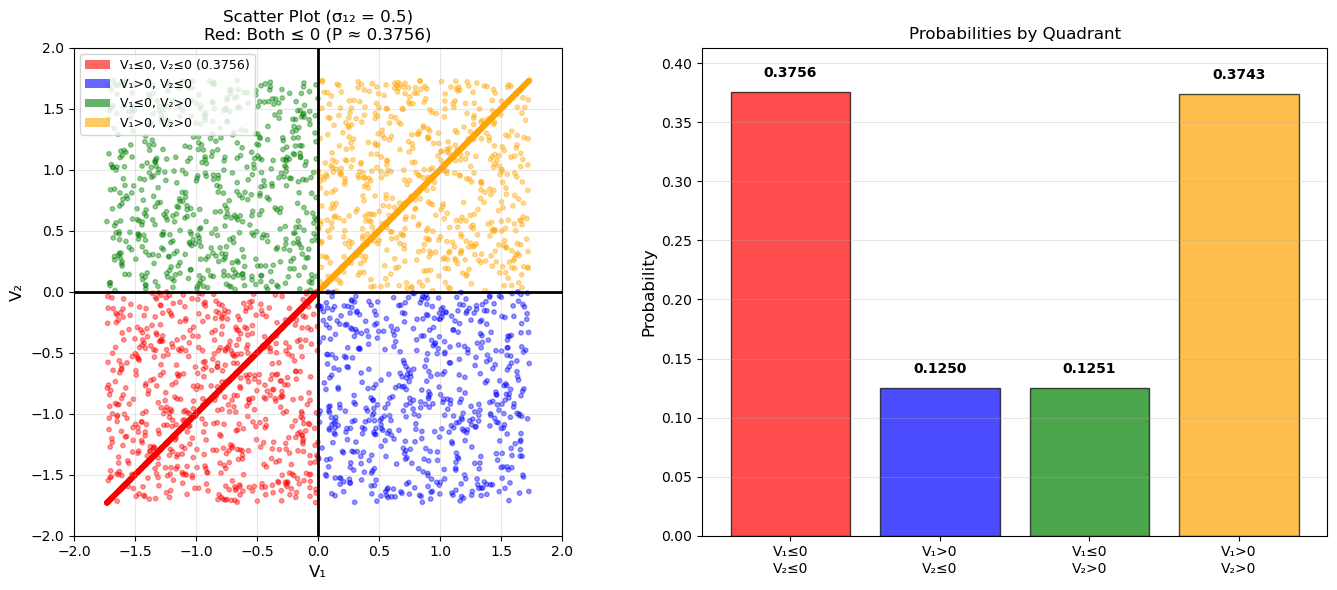


Interpretation:
------------------------------------------------------------
With positive correlation (σ₁₂ = 0.5), the probability
that both variables are negative is HIGHER than if they were
independent (0.25). This captures the idea of joint default risk
in financial applications.


In [34]:
import numpy as np
import matplotlib.pyplot as plt

def generate_correlated_uniforms(sigma_12, n_samples=1000):
    """
    Generate two correlated uniform random variables V₁, V₂
    with E[V₁] = E[V₂] = 0, Var(V₁) = Var(V₂) = 1, and Cov(V₁, V₂) = σ₁₂
    """
    alpha = -np.sqrt(3)
    beta = np.sqrt(3)
    p = 1 - sigma_12
    
    X1 = np.random.uniform(alpha, beta, n_samples)
    X2 = np.random.uniform(alpha, beta, n_samples)
    B = np.random.binomial(1, p, n_samples)
    
    V1 = X1
    V2 = (1 - B) * X1 + B * X2
    
    return V1, V2


# Part (e): Compute P[V₁ ≤ 0, V₂ ≤ 0] for σ₁₂ = 0.5
print("Part (e) Solution:")
print("="*60)
print("\nComputing P[V₁ ≤ 0, V₂ ≤ 0] for σ₁₂ = 0.5")
print("(Probability that both V₁ and V₂ are negative/default)")
print("="*60)

sigma_12 = 0.5
n_samples = 1000000  # Large sample for accurate estimation

# Generate samples
V1, V2 = generate_correlated_uniforms(sigma_12, n_samples)

# Count samples where both V₁ ≤ 0 and V₂ ≤ 0
both_negative = np.sum((V1 <= 0) & (V2 <= 0))
prob_both_negative = both_negative / n_samples

print(f"\nNumber of samples: {n_samples:,}")
print(f"Number where V₁ ≤ 0 AND V₂ ≤ 0: {both_negative:,}")
print(f"\nP[V₁ ≤ 0, V₂ ≤ 0] ≈ {prob_both_negative:.6f}")

# Calculate individual probabilities for comparison
prob_v1_negative = np.sum(V1 <= 0) / n_samples
prob_v2_negative = np.sum(V2 <= 0) / n_samples

print(f"\nFor comparison:")
print(f"P[V₁ ≤ 0] ≈ {prob_v1_negative:.6f} (theoretical: 0.5)")
print(f"P[V₂ ≤ 0] ≈ {prob_v2_negative:.6f} (theoretical: 0.5)")
print(f"P[V₁ ≤ 0] × P[V₂ ≤ 0] ≈ {prob_v1_negative * prob_v2_negative:.6f}")
print(f"  (if independent)")

# Confidence interval (95%)
se = np.sqrt(prob_both_negative * (1 - prob_both_negative) / n_samples)
ci_lower = prob_both_negative - 1.96 * se
ci_upper = prob_both_negative + 1.96 * se

print(f"\n95% Confidence Interval: [{ci_lower:.6f}, {ci_upper:.6f}]")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot showing the four quadrants
sample_size_viz = 5000
V1_viz, V2_viz = generate_correlated_uniforms(sigma_12, sample_size_viz)

# Color points by quadrant
colors = np.where((V1_viz <= 0) & (V2_viz <= 0), 'red',
         np.where((V1_viz > 0) & (V2_viz <= 0), 'blue',
         np.where((V1_viz <= 0) & (V2_viz > 0), 'green', 'orange')))

axes[0].scatter(V1_viz, V2_viz, c=colors, alpha=0.4, s=10)
axes[0].axhline(y=0, color='black', linestyle='-', linewidth=2)
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=2)
axes[0].set_xlabel('V₁', fontsize=12)
axes[0].set_ylabel('V₂', fontsize=12)
axes[0].set_title(f'Scatter Plot (σ₁₂ = {sigma_12})\n' +
                 f'Red: Both ≤ 0 (P ≈ {prob_both_negative:.4f})', 
                 fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-2, 2)
axes[0].set_ylim(-2, 2)
axes[0].set_aspect('equal')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', alpha=0.6, label=f'V₁≤0, V₂≤0 ({prob_both_negative:.4f})'),
    Patch(facecolor='blue', alpha=0.6, label='V₁>0, V₂≤0'),
    Patch(facecolor='green', alpha=0.6, label='V₁≤0, V₂>0'),
    Patch(facecolor='orange', alpha=0.6, label='V₁>0, V₂>0')
]
axes[0].legend(handles=legend_elements, loc='upper left', fontsize=9)

# Bar plot of quadrant probabilities
quadrants = ['V₁≤0\nV₂≤0', 'V₁>0\nV₂≤0', 'V₁≤0\nV₂>0', 'V₁>0\nV₂>0']
probs = [
    np.sum((V1 <= 0) & (V2 <= 0)) / n_samples,
    np.sum((V1 > 0) & (V2 <= 0)) / n_samples,
    np.sum((V1 <= 0) & (V2 > 0)) / n_samples,
    np.sum((V1 > 0) & (V2 > 0)) / n_samples
]
colors_bar = ['red', 'blue', 'green', 'orange']

axes[1].bar(quadrants, probs, color=colors_bar, alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Probability', fontsize=12)
axes[1].set_title('Probabilities by Quadrant', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_ylim(0, max(probs) * 1.1)

# Add probability values on bars
for i, (quad, prob) in enumerate(zip(quadrants, probs)):
    axes[1].text(i, prob + 0.01, f'{prob:.4f}', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('joint_probability_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("Interpretation:")
print("-"*60)
print(f"With positive correlation (σ₁₂ = {sigma_12}), the probability")
print("that both variables are negative is HIGHER than if they were")
print("independent (0.25). This captures the idea of joint default risk")
print("in financial applications.")
print("="*60)

<hr>

**(f)** The Gaussian copula trick is based on first generating a multivariate normal vector with given covariance matrix $\Sigma$, and then using inversion to convert it to a vector of uniform rvs, which can then used to generate the desired rvs. We now demonstrate this in the above setting.

Let $\phi(\cdot)$ denote the 1-d normal cdf. Generate $(Z_1,Z_2)$ as multivariate normals with covariance
$\Sigma =\begin{pmatrix}
		1 & 0.5 \\
		0.5 & 1
	\end{pmatrix}$,
and define $W_1 = \alpha + (\beta-\alpha)\phi(Z_1)$ and $W_2 = \alpha + (\beta-\alpha)\phi(Z_2)$.

Argue $W_1$, $W_2$ are uniform on $[\alpha,\beta]$ (and hence $\mathbb{E}[W_1]=\mathbb{E}[W_2]=0,Var(W_1)=Var(W_2)=1$). Next, for $\sigma_{12}=0.5$ and $\alpha,\beta$ as above, write a function to generate $W_1,W_2$ as described, and use these to plot the scatter plot, and compute $\mathbb{P}[W_1\geq 0,W_2\geq 0]$.

<hr>

## Ans.


COMPARISON: Bernoulli Mixing vs Gaussian Copula

Covariance σ₁₂ = 0.5
Number of samples = 100,000

--------------------------------------------------------------------------------
Statistic                      Bernoulli Method          Gaussian Copula          
--------------------------------------------------------------------------------
E[X₁]                          -0.005257                 0.000202                 
E[X₂]                          -0.003515                 -0.000047                
Var(X₁)                        0.996521                  1.002691                 
Var(X₂)                        0.997187                  1.003529                 
Cov(X₁, X₂)                    0.497444                  0.483729                 
Corr(X₁, X₂)                   0.499009                  0.482224                 
--------------------------------------------------------------------------------

Joint Probabilities:
-------------------------------------------------------

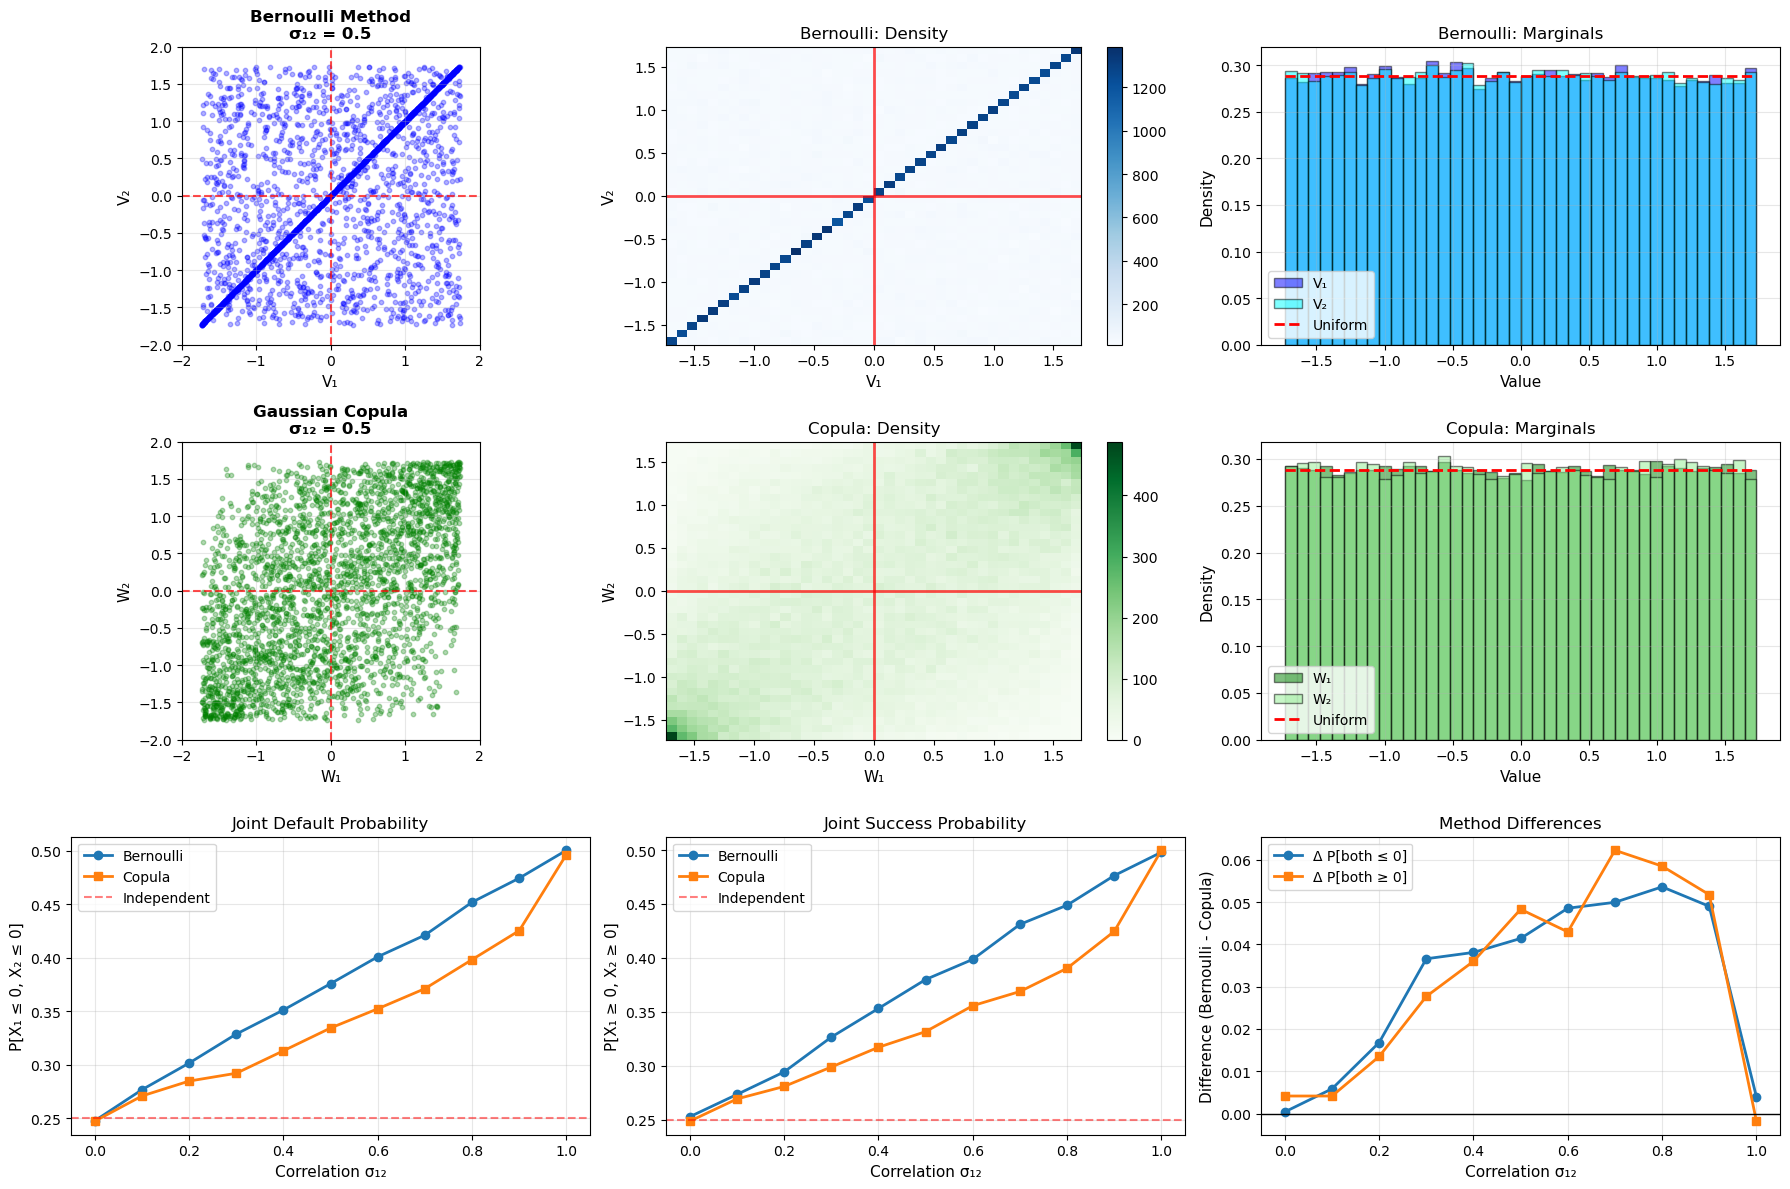

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

def generate_correlated_uniforms_bernoulli(sigma_12, n_samples=1000):
    """Method from parts (a)-(d): Using Bernoulli mixing"""
    alpha = -np.sqrt(3)
    beta = np.sqrt(3)
    p = 1 - sigma_12
    
    X1 = np.random.uniform(alpha, beta, n_samples)
    X2 = np.random.uniform(alpha, beta, n_samples)
    B = np.random.binomial(1, p, n_samples)
    
    V1 = X1
    V2 = (1 - B) * X1 + B * X2
    
    return V1, V2

def generate_gaussian_copula_uniforms(sigma_12, n_samples=1000):
    """Method from part (f): Using Gaussian copula"""
    alpha = -np.sqrt(3)
    beta = np.sqrt(3)
    
    mean = [0, 0]
    cov_matrix = [[1, sigma_12], [sigma_12, 1]]
    
    Z = multivariate_normal.rvs(mean=mean, cov=cov_matrix, size=n_samples)
    Z1 = Z[:, 0]
    Z2 = Z[:, 1]
    
    U1 = norm.cdf(Z1)
    U2 = norm.cdf(Z2)
    
    W1 = alpha + (beta - alpha) * U1
    W2 = alpha + (beta - alpha) * U2
    
    return W1, W2

print("="*80)
print("COMPARISON: Bernoulli Mixing vs Gaussian Copula")
print("="*80)

sigma_12 = 0.5
n_samples = 100000

# Generate samples using both methods
V1, V2 = generate_correlated_uniforms_bernoulli(sigma_12, n_samples)
W1, W2 = generate_gaussian_copula_uniforms(sigma_12, n_samples)

# Compute statistics for both methods
print(f"\nCovariance σ₁₂ = {sigma_12}")
print(f"Number of samples = {n_samples:,}")
print("\n" + "-"*80)
print(f"{'Statistic':<30} {'Bernoulli Method':<25} {'Gaussian Copula':<25}")
print("-"*80)

stats = [
    ("E[X₁]", np.mean(V1), np.mean(W1)),
    ("E[X₂]", np.mean(V2), np.mean(W2)),
    ("Var(X₁)", np.var(V1), np.var(W1)),
    ("Var(X₂)", np.var(V2), np.var(W2)),
    ("Cov(X₁, X₂)", np.cov(V1, V2)[0,1], np.cov(W1, W2)[0,1]),
    ("Corr(X₁, X₂)", np.corrcoef(V1, V2)[0,1], np.corrcoef(W1, W2)[0,1]),
]

for stat_name, val_bern, val_copula in stats:
    print(f"{stat_name:<30} {val_bern:<25.6f} {val_copula:<25.6f}")

print("-"*80)

# Joint probabilities
prob_V_both_neg = np.sum((V1 <= 0) & (V2 <= 0)) / n_samples
prob_W_both_neg = np.sum((W1 <= 0) & (W2 <= 0)) / n_samples
prob_V_both_pos = np.sum((V1 >= 0) & (V2 >= 0)) / n_samples
prob_W_both_pos = np.sum((W1 >= 0) & (W2 >= 0)) / n_samples

print("\nJoint Probabilities:")
print("-"*80)
print(f"{'Probability':<30} {'Bernoulli Method':<25} {'Gaussian Copula':<25}")
print("-"*80)
print(f"{'P[X₁ ≤ 0, X₂ ≤ 0]':<30} {prob_V_both_neg:<25.6f} {prob_W_both_neg:<25.6f}")
print(f"{'P[X₁ ≥ 0, X₂ ≥ 0]':<30} {prob_V_both_pos:<25.6f} {prob_W_both_pos:<25.6f}")
print("-"*80)

# Visualization
fig = plt.figure(figsize=(18, 12))

sample_viz = 3000

# Bernoulli Method visualizations
V1_viz, V2_viz = generate_correlated_uniforms_bernoulli(sigma_12, sample_viz)

# 1. Scatter plot - Bernoulli
ax1 = plt.subplot(3, 3, 1)
ax1.scatter(V1_viz, V2_viz, alpha=0.3, s=10, color='blue')
ax1.axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax1.axvline(x=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax1.set_xlabel('V₁', fontsize=11)
ax1.set_ylabel('V₂', fontsize=11)
ax1.set_title(f'Bernoulli Method\nσ₁₂ = {sigma_12}', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_aspect('equal')

# 2. 2D histogram - Bernoulli
ax2 = plt.subplot(3, 3, 2)
h1 = ax2.hist2d(V1, V2, bins=40, cmap='Blues')
ax2.axhline(y=0, color='red', linestyle='-', linewidth=2, alpha=0.7)
ax2.axvline(x=0, color='red', linestyle='-', linewidth=2, alpha=0.7)
ax2.set_xlabel('V₁', fontsize=11)
ax2.set_ylabel('V₂', fontsize=11)
ax2.set_title('Bernoulli: Density', fontsize=12)
plt.colorbar(h1[3], ax=ax2)

# 3. Marginal distributions - Bernoulli
ax3 = plt.subplot(3, 3, 3)
ax3.hist(V1, bins=40, density=True, alpha=0.5, color='blue', label='V₁', edgecolor='black')
ax3.hist(V2, bins=40, density=True, alpha=0.5, color='cyan', label='V₂', edgecolor='black')
x_range = np.linspace(-np.sqrt(3), np.sqrt(3), 100)
uniform_density = 1 / (2 * np.sqrt(3))
ax3.plot(x_range, [uniform_density] * len(x_range), 'r--', linewidth=2, label='Uniform')
ax3.set_xlabel('Value', fontsize=11)
ax3.set_ylabel('Density', fontsize=11)
ax3.set_title('Bernoulli: Marginals', fontsize=12)
ax3.legend()
ax3.grid(True, alpha=0.3)

# Gaussian Copula visualizations
W1_viz, W2_viz = generate_gaussian_copula_uniforms(sigma_12, sample_viz)

# 4. Scatter plot - Gaussian Copula
ax4 = plt.subplot(3, 3, 4)
ax4.scatter(W1_viz, W2_viz, alpha=0.3, s=10, color='green')
ax4.axhline(y=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax4.axvline(x=0, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax4.set_xlabel('W₁', fontsize=11)
ax4.set_ylabel('W₂', fontsize=11)
ax4.set_title(f'Gaussian Copula\nσ₁₂ = {sigma_12}', fontsize=12, fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.set_xlim(-2, 2)
ax4.set_ylim(-2, 2)
ax4.set_aspect('equal')

# 5. 2D histogram - Gaussian Copula
ax5 = plt.subplot(3, 3, 5)
h2 = ax5.hist2d(W1, W2, bins=40, cmap='Greens')
ax5.axhline(y=0, color='red', linestyle='-', linewidth=2, alpha=0.7)
ax5.axvline(x=0, color='red', linestyle='-', linewidth=2, alpha=0.7)
ax5.set_xlabel('W₁', fontsize=11)
ax5.set_ylabel('W₂', fontsize=11)
ax5.set_title('Copula: Density', fontsize=12)
plt.colorbar(h2[3], ax=ax5)

# 6. Marginal distributions - Gaussian Copula
ax6 = plt.subplot(3, 3, 6)
ax6.hist(W1, bins=40, density=True, alpha=0.5, color='green', label='W₁', edgecolor='black')
ax6.hist(W2, bins=40, density=True, alpha=0.5, color='lightgreen', label='W₂', edgecolor='black')
ax6.plot(x_range, [uniform_density] * len(x_range), 'r--', linewidth=2, label='Uniform')
ax6.set_xlabel('Value', fontsize=11)
ax6.set_ylabel('Density', fontsize=11)
ax6.set_title('Copula: Marginals', fontsize=12)
ax6.legend()
ax6.grid(True, alpha=0.3)

# Comparison across different correlations
ax7 = plt.subplot(3, 3, 7)
sigma_values = np.linspace(0, 1, 11)
probs_bern_neg = []
probs_copula_neg = []

for s in sigma_values:
    V1_temp, V2_temp = generate_correlated_uniforms_bernoulli(s, 20000)
    W1_temp, W2_temp = generate_gaussian_copula_uniforms(s, 20000)
    
    probs_bern_neg.append(np.sum((V1_temp <= 0) & (V2_temp <= 0)) / 20000)
    probs_copula_neg.append(np.sum((W1_temp <= 0) & (W2_temp <= 0)) / 20000)

ax7.plot(sigma_values, probs_bern_neg, 'o-', label='Bernoulli', linewidth=2, markersize=6)
ax7.plot(sigma_values, probs_copula_neg, 's-', label='Copula', linewidth=2, markersize=6)
ax7.axhline(y=0.25, color='red', linestyle='--', alpha=0.5, label='Independent')
ax7.set_xlabel('Correlation σ₁₂', fontsize=11)
ax7.set_ylabel('P[X₁ ≤ 0, X₂ ≤ 0]', fontsize=11)
ax7.set_title('Joint Default Probability', fontsize=12)
ax7.legend()
ax7.grid(True, alpha=0.3)

# Comparison of joint positive probability
ax8 = plt.subplot(3, 3, 8)
probs_bern_pos = []
probs_copula_pos = []

for s in sigma_values:
    V1_temp, V2_temp = generate_correlated_uniforms_bernoulli(s, 20000)
    W1_temp, W2_temp = generate_gaussian_copula_uniforms(s, 20000)
    
    probs_bern_pos.append(np.sum((V1_temp >= 0) & (V2_temp >= 0)) / 20000)
    probs_copula_pos.append(np.sum((W1_temp >= 0) & (W2_temp >= 0)) / 20000)

ax8.plot(sigma_values, probs_bern_pos, 'o-', label='Bernoulli', linewidth=2, markersize=6)
ax8.plot(sigma_values, probs_copula_pos, 's-', label='Copula', linewidth=2, markersize=6)
ax8.axhline(y=0.25, color='red', linestyle='--', alpha=0.5, label='Independent')
ax8.set_xlabel('Correlation σ₁₂', fontsize=11)
ax8.set_ylabel('P[X₁ ≥ 0, X₂ ≥ 0]', fontsize=11)
ax8.set_title('Joint Success Probability', fontsize=12)
ax8.legend()
ax8.grid(True, alpha=0.3)

# Difference in joint probabilities
ax9 = plt.subplot(3, 3, 9)
diff_neg = np.array(probs_bern_neg) - np.array(probs_copula_neg)
diff_pos = np.array(probs_bern_pos) - np.array(probs_copula_pos)

ax9.plot(sigma_values, diff_neg, 'o-', label='Δ P[both ≤ 0]', linewidth=2, markersize=6)
ax9.plot(sigma_values, diff_pos, 's-', label='Δ P[both ≥ 0]', linewidth=2, markersize=6)
ax9.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax9.set_xlabel('Correlation σ₁₂', fontsize=11)
ax9.set_ylabel('Difference (Bernoulli - Copula)', fontsize=11)
ax9.set_title('Method Differences', fontsize=12)
ax9.legend()
ax9.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('method_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*80)
